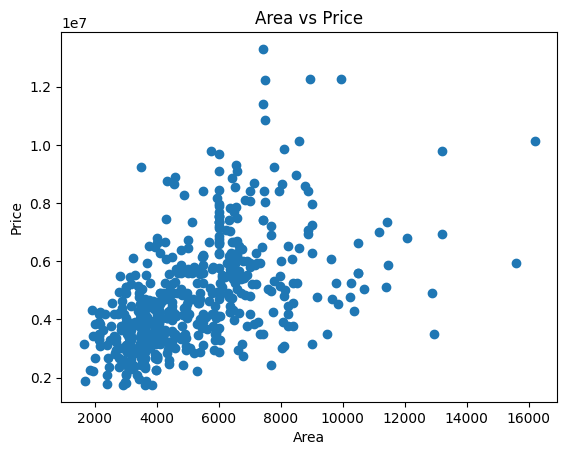

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt

data = pd.read_csv('Housing.csv')

plt.scatter(data['area'], data['price'])
plt.title('Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()


C:\Users\yupad\AppData\Local\Temp\ipykernel_89520\3862301813.py:21: RuntimeWarning: overflow encountered in scalar add
  m_gradient += -(2/n) * x * (y-(m_now * x + b_now))
C:\Users\yupad\AppData\Local\Temp\ipykernel_89520\3862301813.py:21: RuntimeWarning: overflow encountered in scalar multiply
  m_gradient += -(2/n) * x * (y-(m_now * x + b_now))
C:\Users\yupad\AppData\Local\Temp\ipykernel_89520\3862301813.py:24: RuntimeWarning: invalid value encountered in scalar subtract
  m = m_now - L * m_gradient


m: nan , b: nan


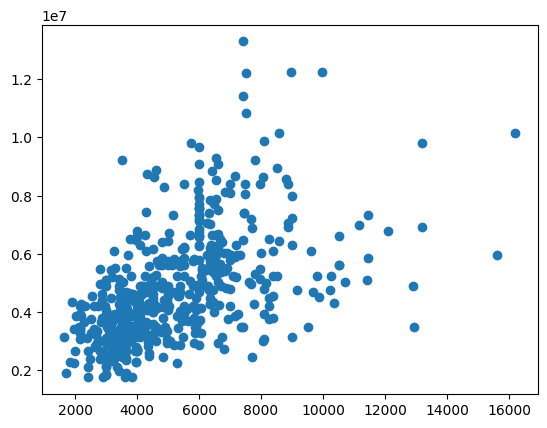

In [7]:
def loss_func(m, c,points):
    total_error = 0

    for i in range(len(points)):
        x = points.iloc[i].area
        y = points.iloc[i].price
        total_error += (y - (m*x + c))**2

    total_error = total_error / len(points)
    return total_error

def gradient_descent(m_now , b_now , points , L):
    m_gradient = 0 
    b_gradient = 0

    n = len(points)
    for i in range(n):
        x = points.iloc[i].area
        y = points.iloc[i].price

        m_gradient += -(2/n) * x * (y-(m_now * x + b_now))
        b_gradient += -(2/n) * (y - ( m_now * x + b_now))
        
    m = m_now - L * m_gradient
    b = b_now - L * b_gradient
    return m,b

m = 0 
b = 0
L = 0.0001
epochs =300

for i in range(epochs):
    m,b = gradient_descent(m,b,data,L)
    # print(f'Error: {loss_func(m,b,data)}')

print(f'm: {m} , b: {b}')
plt.scatter(data['area'], data['price'])
plt.plot(data['area'], m*data['area'] + b, color='red')
plt.show()


Epoch 0, Error: 0.9868298300600172
Epoch 50, Error: 0.7480636592834314
Epoch 100, Error: 0.7162798021582856
Epoch 150, Error: 0.7120488276845317
Epoch 200, Error: 0.7114856126874636
Epoch 250, Error: 0.7114106391477057
Epoch 300, Error: 0.711400658888492
Epoch 350, Error: 0.711399330345458
Epoch 400, Error: 0.7113991534936794
Epoch 450, Error: 0.7113991299516859
Epoch 500, Error: 0.7113991268178442
Epoch 550, Error: 0.7113991264006763
Epoch 600, Error: 0.711399126345144
Epoch 650, Error: 0.7113991263377519
Epoch 700, Error: 0.7113991263367678
Epoch 750, Error: 0.7113991263366367
Epoch 800, Error: 0.7113991263366194
Epoch 850, Error: 0.711399126336617
Epoch 900, Error: 0.7113991263366167
Epoch 950, Error: 0.7113991263366167
m: 0.5359973448415953, b: 2.763946054699832e-16
Final Error: 0.7113991263366167


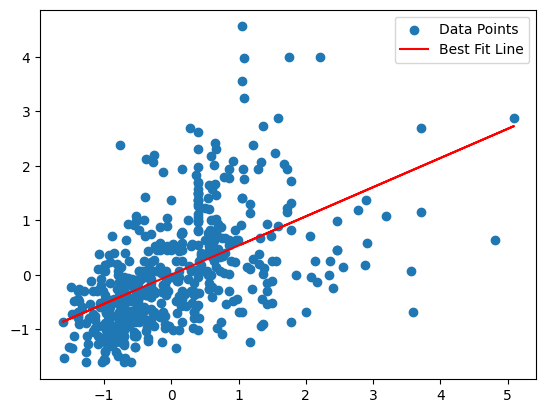

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
data = pd.read_csv('Housing.csv')
# normalization
# Normalize the data
data['area'] = (data['area'] - data['area'].mean()) / data['area'].std()
data['price'] = (data['price'] - data['price'].mean()) / data['price'].std()

# Loss Function
def loss_func(m, c, points):
    total_error = np.mean((points['price'] - (m * points['area'] + c)) ** 2)
    return total_error

# Gradient Descent (Vectorized)
def gradient_descent(m_now, b_now, points, L):
    X = points['area'].values
    Y = points['price'].values
    n = len(X)
    m_gradient = -(2 / n) * np.sum(X * (Y - (m_now * X + b_now)))
    b_gradient = -(2 / n) * np.sum(Y - (m_now * X + b_now))
    m = m_now - L * m_gradient
    b = b_now - L * b_gradient
    return m, b

# Initialize parameters
m = 0
b = 0
L = 0.01  # Learning rate
epochs = 1000

# Run gradient descent
for i in range(epochs):
    m, b = gradient_descent(m, b, data, L)
    if i % 50 == 0:
        print(f'Epoch {i}, Error: {loss_func(m, b, data)}')

# Final results
print(f'm: {m}, b: {b}')
print(f'Final Error: {loss_func(m, b, data)}')

# Plot results
plt.scatter(data['area'], data['price'], label='Data Points')
plt.plot(data['area'], m * data['area'] + b, color='red', label='Best Fit Line')
plt.legend()
plt.show()


In [13]:
mean_area = data['area'].mean()
std_area = data['area'].std()
mean_price = data['price'].mean()
std_price = data['price'].std()

def predict_price(area, m, b, mean_area, std_area, mean_price, std_price):

    # Normalize the input area
    normalized_area = (area - mean_area) / std_area
    
    # Predict the normalized price using the trained model
    normalized_price = m * normalized_area + b
    
    # Denormalize the predicted price
    predicted_price = normalized_price * std_price + mean_price
    
    return predicted_price
# take input from user and then call the function
area = float(input('Enter the area of the house: '))
predicted_price = predict_price(area, m, b, mean_area, std_area, mean_price, std_price)
print(f'The predicted price of the house is: {predicted_price} Rs.')





The predicted price of the house is: 5.359973448415953


Epoch 0, Error: 0.9642229965427176
Epoch 50, Error: 0.4926077830876691
Epoch 100, Error: 0.46760488539758754
Epoch 150, Error: 0.46441779266980165
Epoch 200, Error: 0.4637713832843904
Epoch 250, Error: 0.4636130034267215
Epoch 300, Error: 0.4635698278875039
Epoch 350, Error: 0.4635572853663902
Epoch 400, Error: 0.4635535121457493
Epoch 450, Error: 0.4635523564364781
Epoch 500, Error: 0.4635519992845988
Epoch 550, Error: 0.4635518884340948
Epoch 600, Error: 0.4635518539570936
Epoch 650, Error: 0.46355184322317333
Epoch 700, Error: 0.4635518398796936
Epoch 750, Error: 0.4635518388379944
Epoch 800, Error: 0.4635518385134026
Epoch 850, Error: 0.4635518384122543
Epoch 900, Error: 0.46355183838073355
Epoch 950, Error: 0.46355183837091074
Weights: [0.44091582 0.0782474  0.32241275 0.24654791]
Final Error: 0.46355183836788233


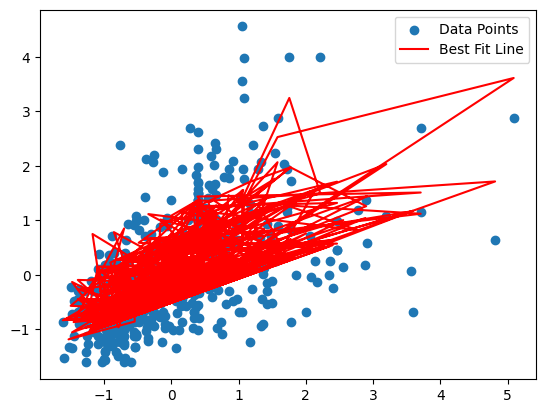

In [14]:
# Now it is time to include other features as well
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
data = pd.read_csv('Housing.csv')

# Normalize the data
features = ['area', 'bedrooms', 'bathrooms', 'stories']
for feature in features:
    data[feature] = (data[feature] - data[feature].mean()) / data[feature].std()
data['price'] = (data['price'] - data['price'].mean()) / data['price'].std()

# Loss Function
def loss_func(weights, points):
    X = points[features].values
    Y = points['price'].values
    predictions = np.dot(X, weights)
    total_error = np.mean((Y - predictions) ** 2)
    return total_error

# Gradient Descent (Vectorized)
def gradient_descent(weights, points, L):
    X = points[features].values
    Y = points['price'].values
    n = len(X)
    predictions = np.dot(X, weights)
    gradients = -(2 / n) * np.dot(X.T, (Y - predictions))
    weights = weights - L * gradients
    return weights

# Initialize parameters
weights = np.zeros(len(features))
L = 0.01  # Learning rate
epochs = 1000

# Run gradient descent
for i in range(epochs):
    weights = gradient_descent(weights, data, L)
    if i % 50 == 0:
        print(f'Epoch {i}, Error: {loss_func(weights, data)}')

# Final results
print(f'Weights: {weights}')
print(f'Final Error: {loss_func(weights, data)}')

# Plot results (only for area vs price)
plt.scatter(data['area'], data['price'], label='Data Points')
plt.plot(data['area'], np.dot(data[features].values, weights), color='red', label='Best Fit Line')
plt.legend()
plt.show()

In [16]:
# Calculate the means and standard deviations for all features
means = data[features].mean()
stds = data[features].std()

# Update the function to handle multiple features
def predict_price(features_values, weights, means, stds):
    # Normalize the input features
    normalized_features = [(value - means[feature]) / stds[feature] for feature, value in zip(features, features_values)]
    
    # Predict the normalized price using the trained model (dot product with weights)
    normalized_price = np.dot(normalized_features, weights)
    
    # Denormalize the predicted price
    predicted_price = normalized_price * std_price + mean_price
    
    return predicted_price

# Input: Take values for all features (area, bedrooms, bathrooms, stories)
area = float(input('Enter the area of the house: '))
bedrooms = int(input('Enter the number of bedrooms: '))
bathrooms = int(input('Enter the number of bathrooms: '))
stories = int(input('Enter the number of stories: '))

# Create a list of feature values
features_values = [area, bedrooms, bathrooms, stories]

# Predict the price using the function
predicted_price = predict_price(features_values, weights, means, stds)

# Output the predicted price
print(f'The predicted price of the house is: {predicted_price} Rs.')


The predicted price of the house is: 7144.687799800508 Rs.
